In [33]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Find the slope at a point of a function

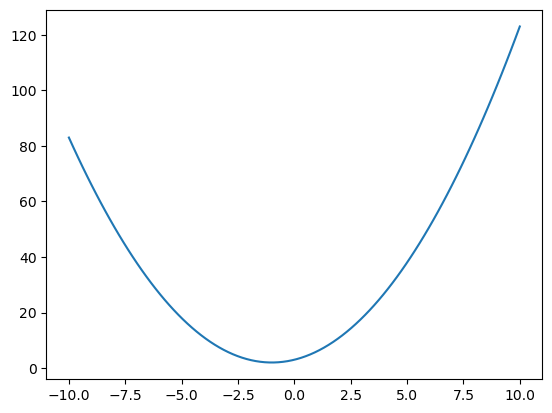

In [2]:
def f(x):
    return x**2 + 2*x + 3

plt.figure()
x = np.linspace(-10, 10, 100)
y = f(x)
plt.plot(x, y)
plt.show()

In [3]:
x = 2.5
h = 1e-6
x_prime = x + h
print((f(x_prime) - f(x)) / h)

7.000001001955525


# Multi-Layer Perceptrons

In [50]:
class Value:
    def __init__(self, data, _children = (), operation = "", label = ""):
        self.data = data
        self._prev = set(_children)
        self._label = label
        self._operation = operation

        self.grad = 0.0

        self._backward = lambda: None

    # activation functions
    def tanh(self):
        x = self.data
        value = Value(1 - 2 / (math.exp(2*x) + 1))
        def _backward():
            self.grad += (1 - value.data**2) * value.grad

        value._backward = _backward
        return value

    def relu(self):
        x = self.data
        value = max(0, x)
        return Value(value, _children = (self,), operation = "relu")

    def __add__(self, other):
        value = Value(self.data + other.data, _children = (self, other),\
                     operation = "+")

        def _backward():
            self.grad += value.grad
            other.grad += value.grad

        value._backward = _backward
        return value

    def __sub__(self, other):
        return Value(self.data - other.data, _children = (self, other),\
                     operation = "-")

    def __mul__(self, other):
        return Value(self.data * other.data, _children = (self, other),\
                     operation = "*")

    def __truediv__(self, other):
        return Value(self.data / other.data, _children = (self, other),\
                     operation = "/")

    def __pow__(self, other):
        return Value(self.data ** other, _children = (self, other),\
                     operation = "**")

    def __repr__(self):
        return str(self.data)

In [51]:
a = Value(3)
b = Value(4)
t = a.tanh()
c = t + b

c.grad = 1.0
c._backward()
t._backward()

print(a.grad)

0.009866037165440211
